# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [181]:
DATASET_PATH = "./data/heart_disease/"

In [182]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [183]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [184]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [185]:
my_data[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [186]:
y = my_data[target].values

In [187]:
sano_mask = y == 0
enfermo_mask = y > 0

In [188]:
y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

In [189]:
y_class

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [190]:
pd.get_dummies(my_data[categorical_features])

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_?,thal_3.0,thal_6.0,thal_7.0,thal_?
0,1.0,4.0,0.0,2.0,1.0,2.0,False,False,False,True,False,True,False,False,False
1,1.0,4.0,0.0,2.0,1.0,2.0,False,False,True,False,False,False,False,True,False
2,1.0,3.0,0.0,0.0,0.0,3.0,True,False,False,False,False,True,False,False,False
3,0.0,2.0,0.0,2.0,0.0,1.0,True,False,False,False,False,True,False,False,False
4,1.0,2.0,0.0,0.0,0.0,1.0,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.0,1.0,0.0,0.0,0.0,2.0,True,False,False,False,False,False,False,True,False
298,1.0,4.0,1.0,0.0,0.0,2.0,False,False,True,False,False,False,False,True,False
299,1.0,4.0,0.0,0.0,1.0,2.0,False,True,False,False,False,False,False,True,False
300,0.0,2.0,0.0,2.0,0.0,2.0,False,True,False,False,False,True,False,False,False


In [191]:
pca = PCA(n_components=0.9).fit(my_data[numerical_features])

pca.n_components_
pca.explained_variance_ratio_

array([0.74819364, 0.15028534, 0.08510024])

In [192]:
X_transformed = pca.transform(my_data[numerical_features])

In [193]:
X_transformed

array([[ 4.12611449e+01,  4.52935400e+01,  2.19287220e+01],
       [-1.77284853e+01,  2.15134313e+01, -1.15345631e+01],
       [ 2.36314580e+00, -3.98823994e+01,  8.64647444e-01],
       [-4.33351617e+01, -2.37978279e+01,  1.91022481e+00],
       [-1.13524418e+01, -2.85241769e+01, -6.98641020e+00],
       [ 2.18985651e+01, -8.21460560e+00,  9.37207299e+00],
       [ 1.06501486e+02, -1.55652750e+01, -1.52073403e+01],
       [ 7.50464105e+00,  3.81623288e+00, -1.26092590e+00],
       [-4.32977335e+01, -3.92070023e+00,  1.11163027e+01],
       [-5.40980623e+01,  3.77241365e+00,  1.12897981e+01],
       [ 4.76377718e+01, -2.90912923e+00,  6.27919737e+00],
       [ 9.24849808e+00,  7.39584940e+00, -2.90515161e+00],
       [ 1.51476965e+01, -2.62457370e+01, -1.06185163e+01],
       [-4.57346185e+01, -7.58604726e+00,  4.35139896e+01],
       [-7.76379810e+01, -2.01997989e+01,  2.57830861e+01],
       [-1.91160050e+01, -2.11190234e+01, -1.87255792e+01],
       [-7.35353492e+00, -9.23776031e+00

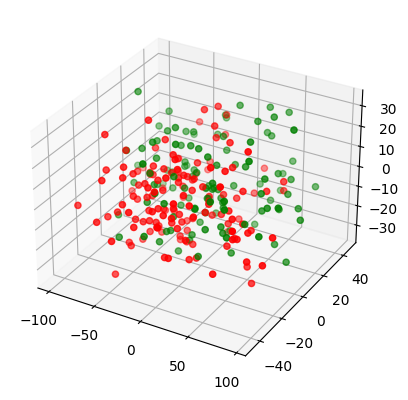

In [194]:
# fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# sns.scatterplot(
#     x=X_transformed[:, 0],
#     y=X_transformed[:, 1],
#     hue=y_class,
#     ax=axes[0],
#     palette={0: "green", 1: "red"},
# )
# sns.scatterplot(
#     x=X_transformed[:, 0],
#     y=X_transformed[:, 2],
#     hue=y_class,
#     ax=axes[1],
#     palette={0: "green", 1: "red"},
# )
# sns.scatterplot(
#     x=X_transformed[:, 1],
#     y=X_transformed[:, 2],
#     hue=y_class,
#     ax=axes[2],
#     palette={0: "green", 1: "red"},
# )

from scipy.stats import zscore

#Eliminamos outliers
z_scores = np.abs(zscore(X_transformed))

X_tr_wo_outliers = X_transformed[(z_scores < 2).all(axis=1)]
y_wo_outliers = y_class[(z_scores < 2).all(axis=1)]

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear scatter plot 3D
ax.scatter(X_tr_wo_outliers[:, 0], X_tr_wo_outliers[:, 1], X_tr_wo_outliers[:, 2], c = ['r' if y == 0 else 'g' for y in y_wo_outliers])

# Mostrar el plot
plt.show()

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [195]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

### RAPIDA VISUALIZACION DE LAS VARIABLES NO NUMERICAS

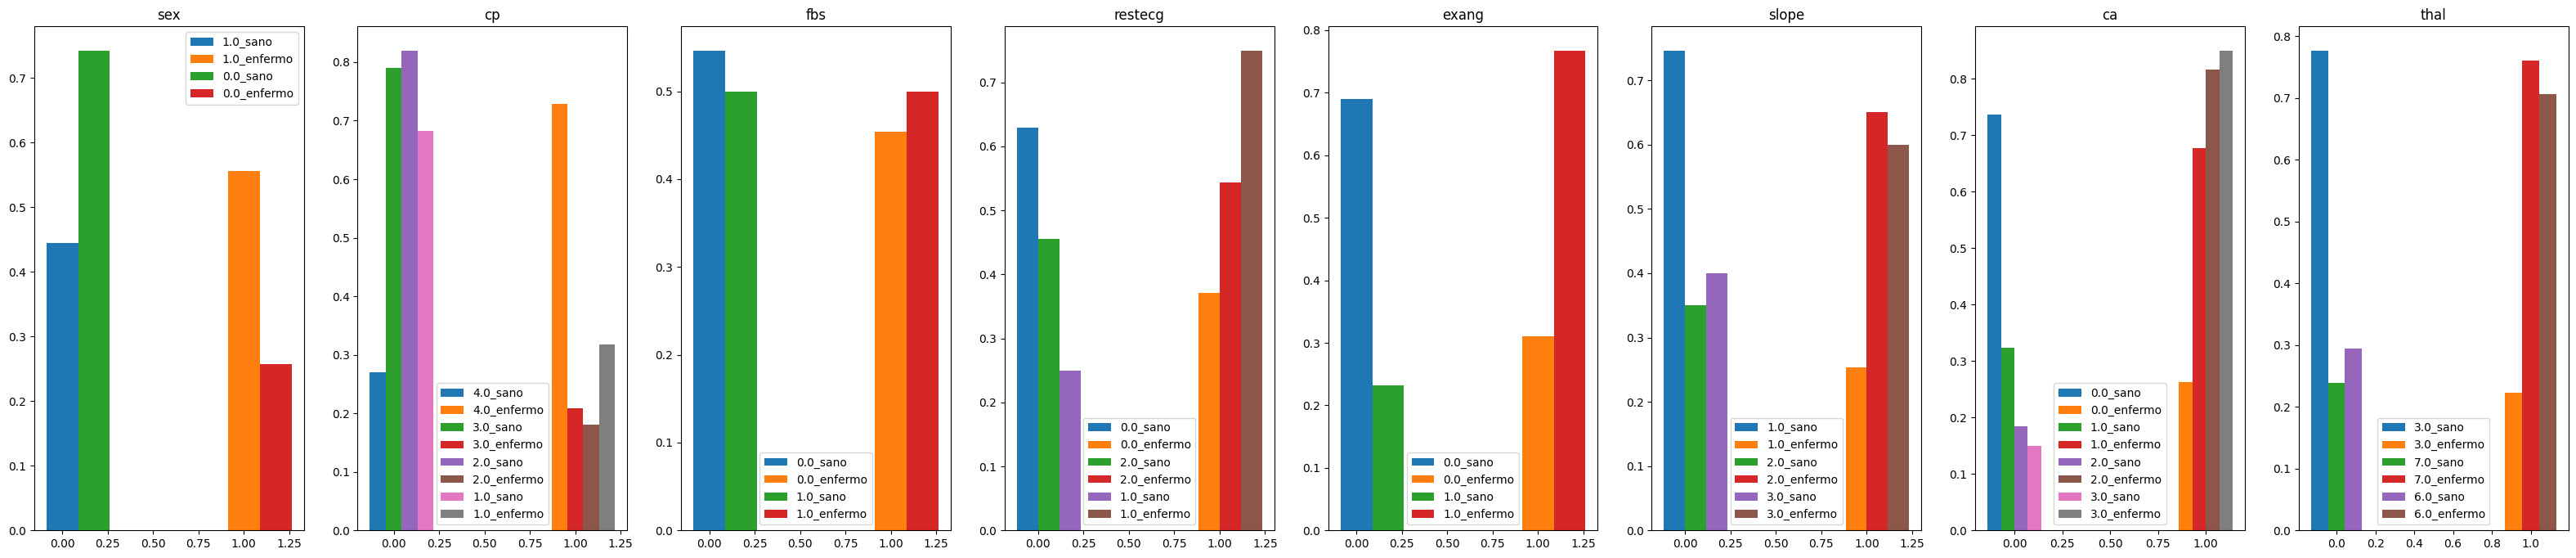

In [196]:
# ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]


fig, axes = plt.subplots(1, len(categorical_features), figsize=(40, 8))

for idx, non_num_var in enumerate(categorical_features):
    cat_vals = my_data[non_num_var]
    counts = cat_vals.value_counts()

    bar_width = 0.35 / len(counts)
    barIdx = 0
    for subcat, val in counts.items():
        if str(subcat) != "?":
            n_zeros = 0
            for i, val in enumerate(y_class):
                if cat_vals[i] == subcat and y_class[i] == 0:
                    n_zeros = n_zeros + 1

            n_unos = 0
            for i, val in enumerate(y_class):
                if cat_vals[i] == subcat and y_class[i] == 1:
                    n_unos = n_unos + 1

            tot = n_zeros + n_unos
            n_zeros = n_zeros / tot
            n_unos = n_unos / tot
            axes[idx].bar(
                0.0 + ((-0.35 / 2) + (barIdx + 1) * bar_width),
                n_zeros,
                width=bar_width,
                label=f"{subcat}_sano",
            )
            axes[idx].bar(
                1.0 + ((-0.35 / 2) + (barIdx + 1) * bar_width),
                n_unos,
                width=bar_width,
                label=f"{subcat}_enfermo",
            )
            barIdx = barIdx + 1
    axes[idx].set_title(non_num_var)
    axes[idx].legend()


### INTERPRETACION DE LOS HISTOGRAMAS

Las barras están distribuidas en dos grupos. En la izquierda esta el grupo de los sanos y en la derecha el grupo de los enfermos. 
De las gráficas podemos concluir que el fbs no es una variable significativa, ya que su distribucion es prácticamente uniforme para todas sus subcategorías (todas las barras cerca de 0.5). Por tanto, eliminamos esa variable del modelo a entrenar.

In [197]:
significative_categorical_features = [
    "sex",
    "cp",
    "restecg",
    "exang",
    "slope",
    "ca",
    "thal",
]

x_cat = my_data[significative_categorical_features]

# One hot encoder
x_cat = OneHotEncoder(handle_unknown="ignore").fit_transform(x_cat)

# Combinar variables categóricas con las no categóricas, split en set de entrenamiento y validación
X_tot = np.hstack((X_transformed, x_cat.toarray()))
x_train, x_test, y_train, y_test = train_test_split(X_tot, y_class, test_size=0.2)


# NOTA: PODEMOS USAR LIBLINEAR PORQUE ESTAMOS CLASIFICANDO BINARIAMENTE
# Entrenar el modelo LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(solver="liblinear", penalty="l2", max_iter=1000)
lr_cv_model.fit(x_train, y_train)
y_pred_cv = lr_cv_model.predict(x_test)
accuracy_cv = accuracy_score(y_test, y_pred_cv)
print(f"Accuracy LogisticRegressionCV: {accuracy_cv:.2f}")

# Entrenar modelo LogisticRegression
lr_model = LogisticRegression(solver="liblinear", penalty="l1", max_iter=1000)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy LogisticRegression: {accuracy:.2f}\n")

# Probamos las predicciones individuales
for n in range(2):
    indexes = []

    for i, val in enumerate(y_test):
        if val == n:
            indexes.append(i)

    if len(indexes) > 0:
        y_test_class = y_test[indexes]
        x_test_class = x_test[indexes]

        y_pred_healthy = lr_cv_model.predict(x_test_class)
        accuracy = accuracy_score(y_test_class, y_pred_healthy)
        print(f"Accuracy LogisticRegressionCV, class {n}: {accuracy:.2f}")

        y_pred_healthy = lr_model.predict(x_test_class)
        accuracy = accuracy_score(y_test_class, y_pred_healthy)
        print(f"Accuracy LogisticRegression, class {n}: {accuracy:.2f}")

Accuracy LogisticRegressionCV: 0.79
Accuracy LogisticRegression: 0.84

Accuracy LogisticRegressionCV, class 0: 0.91
Accuracy LogisticRegression, class 0: 0.91
Accuracy LogisticRegressionCV, class 1: 0.66
Accuracy LogisticRegression, class 1: 0.76


### VAMOS A ENTRENAR LOS MODELOS PARA DETECTAR TODAS LAS CLASES (NO SOLO SANO/ENFERMO)

In [178]:
x_train, x_test, y_train, y_test = train_test_split(X_tot, y, test_size=0.35)

# Entrenar el modelo LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(max_iter=10000)
lr_cv_model.fit(x_train, y_train)
y_pred_cv = lr_cv_model.predict(x_test)
accuracy_cv = accuracy_score(y_test, y_pred_cv)
print(f"Accuracy LogisticRegressionCV: {accuracy_cv:.2f}")

# Entrenar modelo LogisticRegression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy LogisticRegression: {accuracy:.2f}\n")

# Probamos las predicciones individuales
for n in range(5):
    indexes = []

    for i, val in enumerate(y_test):
        if val == n:
            indexes.append(i)

    if len(indexes) > 0:
        y_test_class = y_test[indexes]
        x_test_class = x_test[indexes]

        y_pred_healthy = lr_cv_model.predict(x_test_class)
        accuracy = accuracy_score(y_test_class, y_pred_healthy)
        print(f"Accuracy LogisticRegressionCV, class {n}: {accuracy:.2f}")

        y_pred_healthy = lr_model.predict(x_test_class)
        accuracy = accuracy_score(y_test_class, y_pred_healthy)
        print(f"Accuracy LogisticRegression, class {n}: {accuracy:.2f}")

Accuracy LogisticRegressionCV: 0.59
Accuracy LogisticRegression: 0.58

Accuracy LogisticRegressionCV, class 0: 0.82
Accuracy LogisticRegression, class 0: 0.82
Accuracy LogisticRegressionCV, class 1: 0.27
Accuracy LogisticRegression, class 1: 0.20
Accuracy LogisticRegressionCV, class 2: 0.25
Accuracy LogisticRegression, class 2: 0.33
Accuracy LogisticRegressionCV, class 3: 0.38
Accuracy LogisticRegression, class 3: 0.31
Accuracy LogisticRegressionCV, class 4: 0.00
Accuracy LogisticRegression, class 4: 0.00


### INTERPRETACIÓN DE LOS RESULTADOS

Parece ser que la regresión logística que he implementado, despues de hacer un tratamiento previo de los datos (PCA para los núméricos, cribado y One-Hot encoder para los no numéricos), se comporta muy bien para diagnosticar casos enfermos de los no enfermos. Sin embargo, no tiene un buen desempeño filtrando el tipo de enfermedad, obteniendo bajos valores de precisión en estos casos.

Estoy seguro de que estas regresiones pueden mejorarse con el conociemiento y el tratamiento de los datos adecuado. 